# GLMs part 1: logistic regression

## Overview
So far in this course, we've covered methods for modeling a _continuous_ response variable $y\in\mathbb{R}$ as a linear function of features $\boldsymbol{x}\in\mathbb{R}^p$ using the generic form

$$
y = \boldsymbol{\beta}\cdot \boldsymbol{x} + \varepsilon.
$$

We've also discussed extensions where the model can be non-linear in the features, provided it is linear in the parameters, i.e. a model of the form

$$
y = \boldsymbol{\beta}\cdot \phi(\boldsymbol{x}) + \varepsilon \hspace{10mm} (1)
$$

where $\phi$ is some pre-defined feature map. In this case, if $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{E}[\varepsilon^2] = \sigma^2$, then we get that 

$$
\mathbb{E}[y \mid \boldsymbol{x},\boldsymbol{\beta}] = \boldsymbol{\beta}\cdot\phi(\boldsymbol{x})\;\;\;\; \text{ and }\;\;\;\; \text{Var}[y\mid \boldsymbol{x},\boldsymbol{\beta}] = \sigma^2.
$$ 

For example, when we assume $\varepsilon \sim N(0,\sigma^2)$, we found that $y\mid \boldsymbol{x},\boldsymbol{\beta} \sim N(\boldsymbol{\beta}\cdot \phi(\boldsymbol{x}), \sigma^2)$. This is often a natural model for a continuous response variables.

In many practical situations, however, we may be interested in predicting a response variable which does not take on continuous values. For example, which might want to build a model to predict whether or not an individual will default on a loan, given a variety of attributes of the individual. In this case, $y\in \{\text{default}, \text{no default}\}$. Or, we might want to estimate the number of calls a call center will recieve, given features like the time of day, whether, etc, in which case $y\in \{0,1,2,\dots\}$. In both of these cases, the reponse $y$ takes on discrete values, in which case the model $(1)$ is no longer suited to the problem.

_Generalized linear models_ (or GLMs) are a framework for modeling more general types of response variables. The step is to define a _link function_ $g$ such that

$$
g(\mathbb{E}[y\mid \boldsymbol{x},\boldsymbol{\beta}]) = \boldsymbol{\beta}\cdot \boldsymbol{x}.
$$

Note that linear regression is just a special case of this where $g(z) = z$ is the identity function. Typically we will make certain assumptions about $g$, namely we will require that it is monotone and invertible, so that $g(a) = b \iff a = g^{-1}(b)$. There will also be a natural correspondence between GLMs and the so-called exponential family of distributions, which we will discuss in more detail in a later notebook. For now, we will introduce the most widely used GLM, the logistic regression model, which can be used to model a binary response variable.

## Logistic regression

Consider a prediction problem with a binary response variable $y\in \{0,1\}$ (here we model the outcome as either 0 or 1, though you can think of these as encodings for whatever binary response we want, e.g. "default" vs "no default", "dog" vs "cat", etc.). In logistic regression, we directly model the probability of an observation being in either class using the _logistic function_:

$$
\mathbb{E}[y\mid \boldsymbol{x},\boldsymbol{\beta}] = P(y= 1\mid \boldsymbol{x},\boldsymbol{\beta}) = \frac{1}{1+e^{-\boldsymbol{\beta}\cdot \boldsymbol{x}}}.
$$

Notice that this corresponds to our definition of a generalized linear model associated with the link function

$$
g(z) = \log\left(\frac{z}{1-z}\right)
$$

since

$$
g(\mathbb{E}[y\mid \boldsymbol{x},\boldsymbol{\beta}]) = \boldsymbol{\beta}\cdot \boldsymbol{x}.
$$

Now that we've defined the model, we need a method to actually fit the parameters $\boldsymbol{\beta}$ given a set of data $(\boldsymbol{x}_1,y_1),\dots,(\boldsymbol{x}_n,y_n)$. To do this, we will again use maximum likelihood estimation (similar to what we did for the [Gaussian model](../basic_linear_regression/maximum_likelihood_estimation.md)). For compactness, define $p_{\boldsymbol{\beta}}(\boldsymbol{x}) = P(Y=1\mid \boldsymbol{x},\boldsymbol{\beta})$. For an individual sample $(\boldsymbol{x},y)$, the likelihood is

$$
L(\boldsymbol{\beta}; \boldsymbol{x},y) = \begin{cases} p_{\boldsymbol{\beta}}(\boldsymbol{x}) & \text{if } y = 1\\ 1-p_{\boldsymbol{\beta}}(\boldsymbol{x}) & \text{if } y=0 \end{cases}
$$

This can concisely be written in a single expression:

$$
L(\boldsymbol{\beta}; \boldsymbol{x},y) = p_{\boldsymbol{\beta}}(\boldsymbol{x})^{y}(1-p_{\boldsymbol{\beta}}(\boldsymbol{x}))^{1-y}.
$$

Then if the $y_i$'s are conditionally independent given the $\boldsymbol{x}_i$'s, the likelihood is

$$
L(\boldsymbol{\beta}; (\boldsymbol{x}_i,y_i)_{i=1}^n) = \prod_{i=1}^n  p_{\boldsymbol{\beta}}(\boldsymbol{x}_i)^{y_i}(1-p_{\boldsymbol{\beta}}(\boldsymbol{x}_i))^{1-y_i}
$$

and hence the negative log likelihood (which we want to minimize) is:

$$
\ell(\boldsymbol{\beta}) = -\log L(\boldsymbol{\beta}; (\boldsymbol{x}_i,y_i)_{i=1}^n) = -\sum_{i=1}^n \{y_i \log p_{\boldsymbol{\beta}}(\boldsymbol{x}_i) + (1-y_i)\log(1-p_{\boldsymbol{\beta}}(\boldsymbol{x}_i))\}.
$$

To find the minimizer, we would like to find $\boldsymbol{\beta}$ such that $\nabla_{\boldsymbol{\beta}}\ell(\boldsymbol{\beta})=0$. With some calculus, we can calculate that

$$
\nabla_{\boldsymbol{\beta}}\ell(\boldsymbol{\beta}) = \boldsymbol{X}^\top (p_{\boldsymbol{\beta}}(\boldsymbol{X}) - \boldsymbol{y})
$$

where $p_{\boldsymbol{\beta}}(\boldsymbol{X}) = \begin{bmatrix}p_{\boldsymbol{\beta}}(\boldsymbol{x}_1) & \cdots & p_{\boldsymbol{\beta}}(\boldsymbol{x}_n)\end{bmatrix}$. Unfortunately, unlike in linear regression, setting this equal to zero does not give an analytical solution for $\boldsymbol{\beta}$. Instead, we must use a numerical optimization algorithm to solve for the maximum likelihood estimator $\hat{\boldsymbol{\beta}}$. Examples of these algorithms are gradient descent and Newton's method; we won't focus on the details of these techniques too much in this course, though we give a description of how Newton's method for logistic regression below. 

Let's work through an example with an actual dataset. For this, we will work with the well-known Wisconsin Breast Cancer dataset. This dataset contains 30 different attributes for $n=569$ tumors, as well as a label indicating whether the tumor is malignant ($y=1$) or benign ($y=0$). Each feature is a different physical property of the tumor, e.g. radius, perimeter, area, etc.We load the data below.

In [1]:
import pandas as pd

dataset = pd.read_csv("datasets/breast_cancer.csv")
dataset.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The column `diagnosis` contains our response, and the ramining columns contain various features. For the sake of this example, we will restrict ourselves to a subset of the features.

In [2]:
import numpy as np
np.random.seed(1)

feature_cols = ["mean radius", "mean texture", "mean smoothness", 
                "mean compactness", "mean symmetry", "mean fractal dimension", 
                "radius error", "texture error", "smoothness error", 
                "compactness error", "symmetry error", "fractal dimension error"]

y = dataset["diagnosis"].to_numpy()
X = dataset[feature_cols].to_numpy()

# add a column of 1's
ones = np.ones((X.shape[0],1))
X = np.hstack([ones, X])

X.shape, y.shape

((569, 13), (569,))

Before actually fitting the logistic regression model, we will hold out 100 of our examples for testing in a later section of this notebook.

In [3]:
ix_test = np.random.choice(X.shape[0], 100, replace=False)
ix_train = [j for j in range(X.shape[0]) if j not in ix_test]

X_train, y_train = X[ix_train], y[ix_train]
X_test, y_test = X[ix_test], y[ix_test]

X_train.shape, X_test.shape

((469, 13), (100, 13))

We can fit the model using the `statsmodels` package, as shown in the following cell.

In [4]:
import statsmodels.api as sm 

model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.122233
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  469
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                           12
Date:                Thu, 27 Oct 2022   Pseudo R-squ.:                  0.8143
Time:                        19:43:17   Log-Likelihood:                -57.327
converged:                       True   LL-Null:                       -308.77
Covariance Type:            nonrobust   LLR p-value:                5.406e-100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.0525     10.556     -3.605      0.000     -58.742     -17.363
x1             1.0621      0.277      3.835      0.000       0.519       1.605
x2             0.4361      0.085      5.109      0.000       0.269       0.603
x3            43.5993     38.289      1.139      0.255     -31.447     118.645
x4            42.0605     22.336      1.883      0.060      -1.718      85.839
x5            20.0628     15.632      1.283      0.199     -10.575      50.701
x6            34.4038    127.147      0.271      0.787    -214.799     283.607
x7            10.5655      3.060      3.453      0.001       4.568      16.563
x8            -1.2429      0.708     -1.756      0.079      -2.630       0.144
x9            -2.0025    111.843     -0.018      0.986    -221.211     217.206
x10            3.6880     40.481      0.091      0.927     -75.654      83.030
x11          -52.5009     56.204     -0.934      0.350    -162.658      57.656
x12         -585.9642    314.301     -1.864      0.062   -1201.983      30.054
==============================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

> Remark: The output here contains a lot of information, like test statistics for each of the coefficients. For the most part, these can be interepreted in the same way as for the usual linear regression model, though with the caveat that the p-values are only _asymptotically_ valid. We discuss this in some more detail in a later notebook.

Now that we've fit the model, we would like to evaluate its performance. However, we haven't discussed how to do this yet for a model with discrete responses; we introduce a few approaches to doing so in the next section.

## Evaluating classification models

For linear regression, we saw a few different metrics for evaluating performance, for example: the MSE on the training set, the (adjusted)-$R^2$, or an MSE computed using cross validation. These are all metrics that are natural when working with a continuous response $y\in \mathbb{R}$, but they aren't applicable in a classification setting, e.g. when $y\in \{0,1\}$.

In this section, we introduce a few common methods for evaluating classification models, and logistic regression models in particular. Given the fitted parameters $\hat{\boldsymbol{\beta}}$ of a logistic regression model, we can compute the probability that the response $y = 1$ for a particular value of $\boldsymbol{x}$ as

$$
p_{\hat{\boldsymbol{\beta}}}(\boldsymbol{x}) = P(y=1\mid \boldsymbol{x},\hat{\boldsymbol{\beta}}) = \frac{1}{1+e^{-\hat{\boldsymbol{\beta}}\cdot \boldsymbol{x}}}. \hspace{10mm} (2)
$$

We can turn this probability into an actual classifier, i.e. a function $C(\boldsymbol{x})$ which makes a prediction in $\{0,1\}$, as follows: given a threshold $t \in [0,1]$ let

$$
\hat{C}_t(\boldsymbol{x}) = \begin{cases}1 & \text{if } p_{\hat{\boldsymbol{\beta}}}(\boldsymbol{x})\geq t\\ 0 & \text{if }p_{\hat{\boldsymbol{\beta}}}(\boldsymbol{x}) < t\end{cases}
$$

A natural choice for $t$ would be $1/2$, though as we will see, in certain situations it may make sense to use other values. Given a classifier $\hat{C}_t$, we can define it's _classification error_ as 

$$
\text{Error}(\hat{C}_t) = \frac{1}{n}\sum_{i=1}^n \mathbf{1}(\hat{C}_t(\boldsymbol{x}_i) \neq y_i),
$$

i.e. the classification error is just the fraction of data points the classifier $\hat{C}_t$ incorrectly predicts. Here, the data points $(\boldsymbol{x}_i,y_i)_{i=1}^n$ could either be the data used to fit the model or a hold-out set of examples; these are often called the "training error" and "validation error", respectively. Let's evaluate the classification error for both the training and the hold-out sets. To do this, we first compute the fitted probabilities from the logistic regression model, and then treshold them at $t=1/2$ to obtain our predictions. We can use the built-in method for computing the prediction probabilties called `predict`, although it would be easy enough to do this ourselves using equation $(2)$.

In [5]:
# compute predicted probabilties
p_hat_train = model.predict(X_train)
p_hat_test = model.predict(X_test)

# treshold the predicted probabilities 
y_hat_train = (p_hat_train >= 0.5).astype(int)
y_hat_test = (p_hat_test >= 0.5).astype(int)

# compute the errors
error_train = np.mean(y_hat_train != y_train)
error_test = np.mean(y_hat_test != y_test)

print(f"training error = {round(error_train,3)}, test error = {round(error_test,3)}")

training error = 0.053, test error = 0.09


Based on this measure, the model seems to do pretty well: on the hold-out set of data, we get less than 10% error rate. 

However, the classification error itself is often not sufficient to adequately measure performance. A good example of this is when we have significant inbalance in the label distribution: suppose we have $m=100$ validation examples, $90$ of which have label $0$, and only $10$ of which have label $1$. Then the trivial classifier which always predicts $C(\boldsymbol{x}) = 0$ regardless of the input will have only $10\%$ classification error -- seemingly quite low -- even though the model hasn't actually used the data. Indeed, our dataset has inbalanced classes as well (though to a less dramatic extent), which we can check:

In [6]:
n_malignant = np.sum(y==1)
n_benign = np.sum(y==0)

print(f"# Malignant: {n_malignant}, # Benign: {n_benign}")

# Malignant: 212, # Benign: 357


Instead, we may want to use some more refined metrics. A few of the most common ones are highlighted in the following table.

|              ![](figs/confusion-matrix.png)              |
| :----------------------------------------------------: |
| **Figure 1: Metrics for evaluating a classification model. This matrix is often called the "confusion matrix".** |

The above table containing two rows and two columns is often called the _confusion matrix_ -- it captures the following quantities:

- The number of _true positives_: examples which have true label $1$ which the model predicts as having label $1$
- The number of _false positives_: example which have true label $0$ which the model (incorrectly) predicts as having label $1$
- The number of _true negatives_: examples which have true label $0$ which the model predicts as having label $0$
- The number of _false negatives_: example which have true label $1$ which the model (incorrectly) predicts as having label $0$

From this matrix, we can compute things like the _false positive rate_ (FPR), the fraction of true negatives which are classified as positives or the _true postive rate_ (TPR) the fraction of true positives which are classifier as positives. We can then define the false negative rate as FNR=1-TPR, and the true negative rate as TNR=1-FPR. For example, for the trivial classifier $C(\boldsymbol{x}) =0$ we described earlier, the true negative rate would be $0$ (which is good), but the false negative rate would be $1$ (which is very bad). 

To see the utility of these metrics more concretely, consider again the example of predicting whether a tumor is benign or malignant. In this case, we might be much more concerned with having a low false negative rate than we are about having a high false positive rate: we want to make sure that everyone who _does_ has a malignant tumor is captured, and less concerned if we incorrectly predict that some benign tumors are malignant (as this will be discovered via further tests). Let's compute the confusion matrix for the logistic regression model we fit earlier. Note that we compute these using the testing examples, _not_ the training examples. This allows us to get estimates for how the model will perform on new, unseen samples.

In [7]:
ix_pos = np.argwhere(y_test == 1)
ix_neg = np.argwhere(y_test == 0)

n_true_pos = np.sum(y_hat_test[ix_pos] == 1)
n_false_pos = np.sum(y_hat_test[ix_neg] == 1)
n_true_neg = np.sum(y_hat_test[ix_neg] == 0)
n_false_neg = np.sum(y_hat_test[ix_pos] == 0)

print(f"# True Positives: {n_true_pos}")
print(f"# False Positives: {n_false_pos}")
print(f"# True Negatives: {n_true_neg}")
print(f"# False Negatives: {n_false_neg}")

# True Positives: 33
# False Positives: 3
# True Negatives: 58
# False Negatives: 6


Using these values, we can compute the TPR, FPR, TNR, FNR.

In [8]:
n_pos = np.sum(y_test==1)
n_neg = np.sum(y_test==0)

TPR = n_true_pos/n_pos
FPR = n_false_pos/n_neg
TNR = n_true_neg/n_neg
FNR = n_false_neg/n_pos

print(f"TPR: {round(TPR,3)}, FPR: {round(FPR,3)}, TNR: {round(TNR,3)}, FNR: {round(FNR,3)}")

TPR: 0.846, FPR: 0.049, TNR: 0.951, FNR: 0.154


In this example, we have a false negative rate of approximately $15\%$ -- this means that in about $15\%$ of cases when a tumor is malignant, the model incorrectly predicts that it is benign (i.e., not dangerous). Let's suppose (quite reasonably, in this case) that we wanted to be _really_ sure that we didn't have many false negatives -- say, a false negative rate of less than 1% (equivalently, to require the TPR to be greater than 99%). One way to achieve this is to change the threshold $t$ to something other than $1/2$. For example, suppose we set the threshold $t$ to be 0. Then, by definition of $C_t$, _every_ point would be classified as a positive example, and hence our FNR would be equal to $0$. Of course, this isn't a good idea as we will lose all discriminative power. However, perhaps some value between $0$ and $1/2$ would yield a favorable tradeoff between false positive and true positive rates. One way to visualize this tradeoff is by using a _reciever operating characteristic_ (or ROC) curve. The ROC curve is constructed as follows:

- For a grid of $t$ values between $0$ and $1$, compute $\text{FPR}(t)$ and $\text{TPR}(t)$, the false positive and true positive rates of the classifier $C_t$.
- Plot $\text{FPR}(t)$ against $\text{TPR}(t)$. 

The package `sklearn` provides a method for computing ROC curves in python.

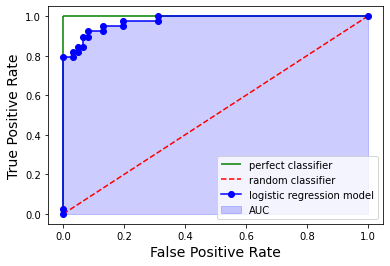

In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

FPRs, TPRs, _ = roc_curve(y_test, p_hat_test)

plt.vlines(0,0,1, color='green', label="perfect classifier")
plt.hlines(1,0,1, color='green')
plt.plot([0,1], [0,1], color='red', linestyle='--', label="random classifier")
plt.plot(FPRs, TPRs, marker='o', color="blue", label="logistic regression model")
plt.fill_between(FPRs, [0]*len(TPRs), TPRs, color="blue", alpha=0.2, label="AUC")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend()
plt.show()

This plot shows an increasing curve representing a tradeoff between false positives and true postives: as we get a larger true positive rate, we must also accept more false positives. For example, to get 99% TPR, we have to tolerate approximately a 35% false positive rate.

How do we assess how "good" an ROC curve is? In the best case, we could get a 100% TPR with a 0% FPR. In this case, the ROC curve would just trace up the left axis across the top of the plot (the green curve in the plot). In the worst case, we could have a random classifier, which randomly predicts either 0 or 1 for every datapoint. In this case, the ROC curve would look like the $y=x$ line in the $[0,1]\times [0,1]$ box (the red line in the plot). This gives us an idea for how we can summarize an entire ROC curve: we can compute the _area under the ROC curve_ (called the AUC, or AU-ROC). The ideal classifier would have a score of $1$ under this metric (i.e. the area of the entire box), while the random classifier would have an AUC of $1/2$. The closer our AUC is to one, the more favorable the tradeoff between the TPR and FPR. We can estimate the AUC in python using the following.

In [10]:
from sklearn.metrics import auc

AUC = auc(FPRs, TPRs)
AUC

0.9760403530895334

We see here that we get an AUC of $\approx 0.97$, which would be considered very high. In other settings, an AUC of $>0.85$ might be considered good, though the exact interpretation will depend on the application. 

## Conclusion

In this section, we introduced the logistic regression model for modeling binary response variable, and covered some basic techniques for evaluating these models. Below, we cover some details of how we can fit logistic regression models (and many other types of models) using an algorithm called Newton's method. In the next section, we will discuss GLMs more generally.

## Bonus: Newton's method for fitting logistic regression
 
Newton's method is a general procedure for finding zeros of a function $g:\mathbb{R}^d\to\mathbb{R}^d$. The general iterations are of the form:

$$
\boldsymbol{x}^{(t+1)} = \boldsymbol{x}^{(t)} - [\nabla g(\boldsymbol{x^{(t)}})]^{-1}g(\boldsymbol{x}^{(t)}),
$$

where here $\nabla g(\boldsymbol{x^{(t)}})$ is the Jacobian matrix of the mapping $g$, i.e. the matrix whose $(i,j)$th entry is $\frac{\partial g_i(\boldsymbol{x}^{(t)})}{\partial \boldsymbol{x}^{(t)}_j}$. To find a minimum of a function $f$, we apply this approach to the function $g = \nabla f:\mathbb{R}^d\to \mathbb{R}^d$ to find a vector $\boldsymbol{x}$ whose gradient is zero. In particular, the iterations are of the form:

$$
\boldsymbol{x}^{(t+1)} = \boldsymbol{x}^{(t)} - [\nabla^2 f(\boldsymbol{x^{(t)}})]^{-1}\nabla f(\boldsymbol{x}^{(t)}).
$$

Newton's method can lead to faster convergence as a function of $t$ than other methods like gradient descent, though it requires computation and inversion of the Hessian matrix, which can make it impractical in some situations. Nonetheless, it performs well in many circumstances, such as the fitting of GLMs. Below we look at an example with logistic regression.

For logistic regression, the function we are interested in minimizing is the negative log-likelihood, which we've seen is given by

$$
\ell(\boldsymbol{\beta}) = -\sum_{i=1}^n \{y_i \log p_{\boldsymbol{\beta}}(\boldsymbol{x}_i) + (1-y_i)\log(1-p_{\boldsymbol{\beta}}(\boldsymbol{x}_i))\}
$$

We saw that the gradient of this function is $\nabla_{\boldsymbol{\beta}}\ell(\boldsymbol{\beta}) = \boldsymbol{X}^\top (p_{\boldsymbol{\beta}}(\boldsymbol{X}) - \boldsymbol{y})$. With some further computation, it can be shown that the Hessian (matrix of second derivatives) of $\ell(\boldsymbol{\beta})$ is given by

$$
\nabla_{\boldsymbol{\beta}}^2\ell(\boldsymbol{\beta}) = \boldsymbol{X}^\top \boldsymbol{W}\boldsymbol{X}
$$

where $\boldsymbol{W}$ is the diagonal matrix whose $i^{th}$ diagonal entry is  $p_{\boldsymbol{\beta}}(\boldsymbol{x}_i)(1-p_{\boldsymbol{\beta}}(\boldsymbol{x}_i))$. Hence, Newton's method finds the maximum likelihood estimator using the following algorithm:

- Randomly initialize $\boldsymbol{\beta}^{(0)}$
- Repeat until convergence: $\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - [\boldsymbol{X}^\top \boldsymbol{W}\boldsymbol{X}]^{-1}\boldsymbol{X}^\top(p_{\boldsymbol{\beta}^{(t)}}(\boldsymbol{X})-\boldsymbol{y}).$

After sufficiently many time steps, this algorithm is guaranteed to converge to the maximum likelihood estimator $\hat{\boldsymbol{\beta}}$. In the below cell, we implement a function to perform Newton's method to fit a logistic regression model.

In [11]:
def logit(z):
    """
    logistic function
    """
    return 1./(1+np.exp(-z))

def grad_l(X, y, beta):
    """
    computes gradient of logistic negative log likelihood
    """
    return np.dot(X.T, logit(np.dot(X, beta)) - y)

def hess_l(X, y, beta):
    """
    computes Hessian of logistic negative log likelihood
    """
    # make W = diag(p(x1)*(1-p(x1)),...,p(xn)*(1-p(xn)))
    p = logit(np.dot(X,beta))
    W = np.diag(p*(1 - p))
    return X.T@W@X
 
def fit_logistic_newton(X, y, eps=1e-5):
    """
    run Newton's method until gradient norm is sufficiently small
    """
    # randomly intialize beta
    beta = np.zeros(X.shape[1])
    grad_norm = eps+1
    # continue as long as gradient norm is larger than threshold eps
    while grad_norm > eps:
        beta -= np.dot(np.linalg.inv(hess_l(X, y, beta)), grad_l(X, y, beta))
        grad_norm = np.linalg.norm(grad_l(X, y, beta))
    return beta

Let's use this method to fit a logistic regression model using the same breast cancer dataset we used above.

In [12]:
fit_logistic_newton(X_train, y_train)

array([-3.80525182e+01,  1.06212694e+00,  4.36064998e-01,  4.35993059e+01,
        4.20604582e+01,  2.00627628e+01,  3.44037893e+01,  1.05654954e+01,
       -1.24290288e+00, -2.00248431e+00,  3.68797130e+00, -5.25008539e+01,
       -5.85964176e+02])

As we can see, the coefficients match what we get from the `statsmodels` package (indeed, `statsmodels` itself uses a variant of Newton's method to fit its models).